# Generative Adversarial Networks

## Prerequisites

I am assuming that you are familiar with how neural networks work.


# 1. GANs Explained

So, a simple model of Generative Adversarial Networks works on two Neural Networks. A Discriminator and a Generator Network, both are trained one by one for several epochs.

## Generator:
Generator network takes random noise as input and generates the final results, for instance if you are training your network to generate Van Gogh’s style with output size 1024 x 512, generator network will have 524288 output neurons and certain number of input neuron which you define to give noise as input.

## Discriminator:
Discriminator is like a detective, its a simple binary classifier, we train it in turns, first we take the original data and train it with positive label. So, we’ll pass Van Gogh’s original work with label 1. And pass generated Van Gogh by generator with label 0.
So, our discriminator gets trained on which one is fake and which one is real.

## Training Generator and Discriminator:
First we train discriminator for certain steps, to train discriminator, we pass data generated by generator, and give target label as 0 to discriminator and again in the same step, we give it a real Van Gogh painting, we then calculate the loss for both and back-propogate, and thats how we train our discriminator to be a good detective.
Now aim of our generator is generate images so real like, so as to fool the detective and so again, we pass random noise to generator, the output of generator is passed to discriminator and the discriminator is then give a target label 1, because generator should be generating images which discriminator should classify real(since we were trying to fool the discriminator). Now the loss calculated is back-propagated to train generator network.

For this article we’ll work on MNIST dataset, so cliche but, one of the best datasets to start with.

# 2. Imports

Lets first do the required imports, you just need, NumPy(you can’t live without numpy, you just can’t), MatplotLib to plot the images of generated number, of course PyTorch, and torchvision to load our MNIST dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 2. Dataset loading

Now load the dataset, and while loading it, lets also apply the normalization.

In [2]:
data_transforms = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True,    
                           download=True, transform=data_transforms)

batch_size=4
dataloader_mnist_train = t_data.DataLoader(mnist_trainset, 
                                           batch_size=batch_size,
                                           shuffle=True
                                           )

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 21393924.69it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


32768it [00:00, 319255.73it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 5638280.69it/s]                           
8192it [00:00, 68102.06it/s]            


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


Apply some basic operation, to load the mnist dataset, dataloader_mnist_train is a torch object, which we will use while training our GANs network.

And since we need to provide the generator network with some random noise,

In [3]:
def make_some_noise():
    return torch.rand(batch_size,100)

# 3. Generator & Discriminator

We’ll now make the generator and discriminator networks, it’s really simple to make a neural network in PyTorch, you can use nn.Modules and that’s it.

In [4]:
# defining generator class

class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,1000),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(1000,800),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(800,out)
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

And now the discriminator network,

In [5]:
# defining discriminator class

class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,200),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(200,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [6]:

dis = discriminator(784,1)
gen = generator(100,784)

Also, we would be needing something to plot our generated results and that’s why we imported MatplotLib.

In [7]:
def plot_img(array,number=None):
    array = array.detach()
    array = array.reshape(28,28)
    
    plt.imshow(array,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    if number:
        plt.xlabel(number,fontsize='x-large')
    plt.show()

Now, we have both the generator network and discriminator network, and dataloader to provide them with data, also we have a plotting function and even a function to make_some_noise 👊. So, lets make some noise by training our networks.


But before starting training, let’s define certain variables, like number of epochs, loss function, optimizer, d_steps and g_steps which will decide after how generator and discriminator networks will be trained.

In [8]:
d_steps = 100
g_steps = 100

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.001, momentum=0.9)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.001, momentum=0.9)

printing_steps = 200

epochs = 50

And finally training:

0


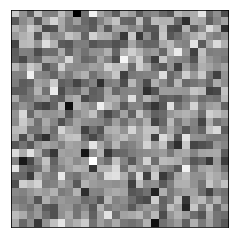

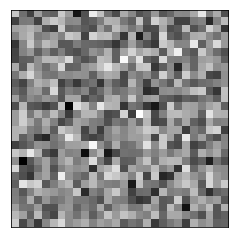

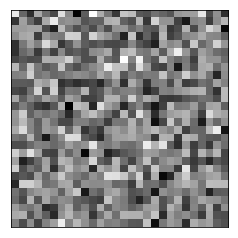

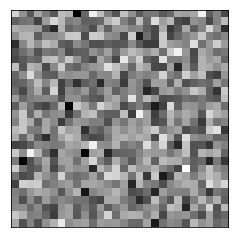




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [9]:
for epoch in range(epochs):
    
    print (epoch)

    # training discriminator
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        for inp_real,_ in dataloader_mnist_train:
            inp_real_x = inp_real
            break

        inp_real_x = inp_real_x.reshape(batch_size,784)
        dis_real_out = dis(inp_real_x)
        dis_real_loss = criteriond1(dis_real_out,
                              Variable(torch.ones(batch_size,1)))
        dis_real_loss.backward()

        # training discriminator on data produced by generator
        inp_fake_x_gen = make_some_noise()
        #output from generator is generated        
        dis_inp_fake_x = gen(inp_fake_x_gen).detach()
        dis_fake_out = dis(dis_inp_fake_x)
        dis_fake_loss = criteriond1(dis_fake_out,
                                Variable(torch.zeros(batch_size,1)))
        dis_fake_loss.backward()

        optimizerd1.step()
        
        
            
    # training generator
    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        gen_inp = make_some_noise()
        
        gen_out = gen(gen_inp)
        dis_out_gen_training = dis(gen_out)
        gen_loss = criteriond2(dis_out_gen_training,
                               Variable(torch.ones(batch_size,1)))
        gen_loss.backward()
        
        optimizerd2.step()
        
    if epoch%printing_steps==0:
        plot_img(gen_out[0])
        plot_img(gen_out[1])
        plot_img(gen_out[2])
        plot_img(gen_out[3])
        print("\n\n")


Now lets go through the training code line by line:

* First we run the loop for epochs.
* Now, we train discriminator network first, and we are doing unsupervised learning, so we don’t need labels. So, as we already had dataloader_mnist_train for training samples, we’ll just take out the training samples in inp_real_x.
* Reshape it, since we are only using linear layers.
* Do a feed-forward from our discriminator network and calculate the loss on the real input, using the criteriond1 we defined above. Since we are giving discriminator our real data, we’ll also give it label 1(torch.ones(batch_size,1)). Now back-propagate the discriminator network.
* Now, we’ll train the discriminator network on the fake data, that is supposed to be coming from the generator network. And our generator takes input from random noise, and discriminator should differentiate between data from generator and the real data, so now we make some noise, pass it to generator, the output from generator will be passed to the discriminator, and since this is coming from generator, we’ll label it as fake output, and compare it with label 0(torch.zeros(batch_size,1)) and back-propagate the discriminator network now.
* Now, we’ll train the generator network, we’ll use make_some_noise and pass the noise to generator network.
* We’ll then pass the output of generator to discriminator and see what discriminator has to say about it. If discriminator predicts 1 for our generated data, well and good, the generator is working okay, and if discriminator predict 0, generator needs to still learn.
* And calculating the loss we back-propagate the generator network, hence training it.

Last of lines are plotting the generator output as we train our GANs network further. You’ll be able to see, how gradually our generator network start producing numbers.


And thats how we trained our first GANs model. And here we were using just dense layers, can get much better results by using convolution layers instead, try it out for yourself.

And try experimenting a little, like maybe add a Sigmoid activation at the end of generator network, much clear images, huh? ;)

Please upvote if you liked!